# Homework 1 Solutions

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline

## Problem 1

In [2]:
# download the data
housing = pd.read_csv("housing.data", sep='\s+', header = None)
# rename the columns
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

### 1A 
Box plot for LSTAT

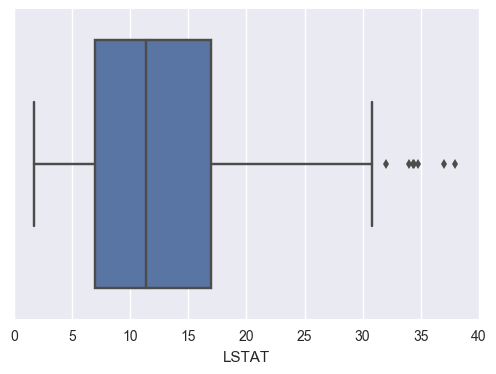

In [3]:
# Box plot for LSTAT
sns.boxplot(x=housing["LSTAT"])
# figure out interquartile range
iqr = housing["LSTAT"].quantile(0.75) - housing["LSTAT"].quantile(0.25)
lbLSTAT = housing["LSTAT"].quantile(0.25) - 1.5 * iqr
ubLSTAT = housing["LSTAT"].quantile(0.75) + 1.5 * iqr

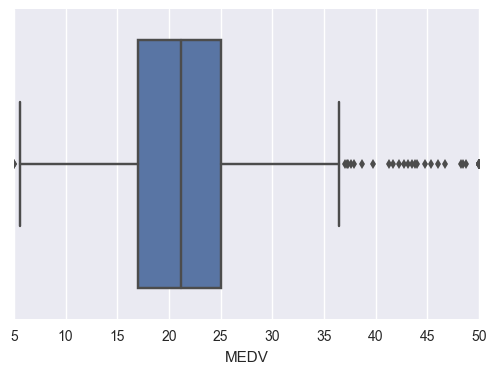

In [4]:
# Box plot for MEDV
sns.boxplot(x=housing["MEDV"])
iqr = housing["MEDV"].quantile(0.75) - housing["MEDV"].quantile(0.25)
lbMEDV = housing["MEDV"].quantile(0.25) - 1.5 * iqr
ubMEDV = housing["MEDV"].quantile(0.75) + 1.5 * iqr

In [5]:
pd.DataFrame([["LSTAT", lbLSTAT, ubLSTAT], ["MEDV", lbMEDV, ubMEDV]], columns=["Variable", "Lower Bound", "UpperBound"])

,Variable,Lower Bound,UpperBound
0,LSTAT,-8.0575,31.9625
1,MEDV,5.0625,36.9625


### 1B: Scatter plot of the two values

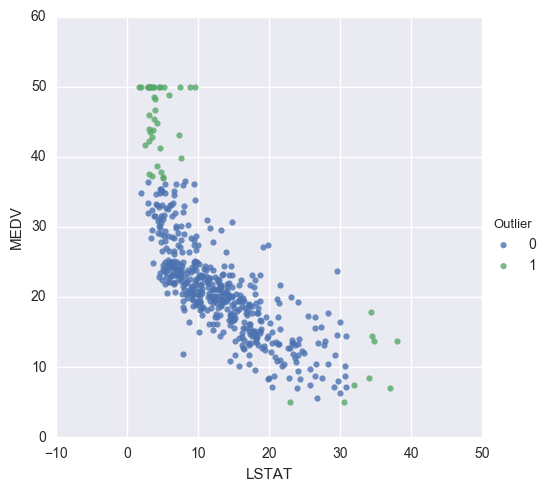

In [6]:
# find the values where the lower bound is existing
housingScat = housing.copy()[["LSTAT", "MEDV"]]
# add a new column with 0
housingScat.loc[:, "Outlier"] = 0
housingScat.loc[(housingScat["LSTAT"] < lbLSTAT) | (housingScat["LSTAT"] > ubLSTAT), "Outlier"] = 1
housingScat.loc[(housingScat["MEDV"] < lbMEDV) | (housingScat["MEDV"] > ubMEDV), "Outlier"] = 1
sns.lmplot('LSTAT', 'MEDV', data=housingScat, hue='Outlier', fit_reg=False)

A linear regression including the outliers would tend to predict higher median home values (MEDV) in areas with low percentage of lower status in the population (LSTAT) than a regression that excluded the outliers.

### 1C: Histogram of MEDV
The histogram shows that the data is not quite distributed as a Gaussian. As a result, it makes sense to perform a log transform to move the tails back in.

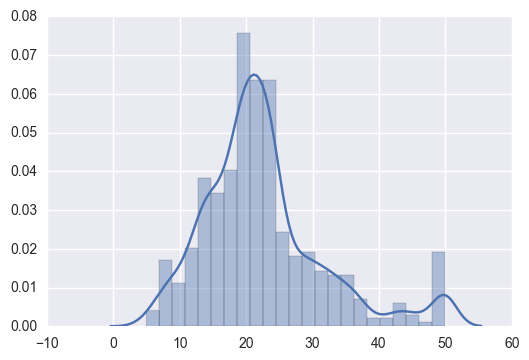

In [7]:
# histogram of the medv values
sns.distplot(housing['MEDV'].values)

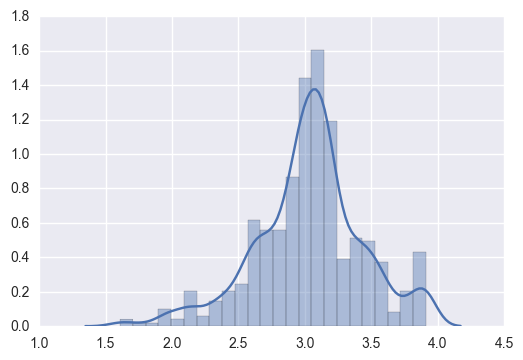

In [8]:
# histogram of the log of medv values
sns.distplot(np.log(housing['MEDV'].values))

### 1D: Linear Regression

In [9]:
import statsmodels.formula.api as smf

# use only specific features
feature_cols = ['LSTAT', 'RM', 'CRIM', 'ZN', 'CHAS']
housData = housing.copy()[feature_cols]
housData.loc[:, "LMEDV"] = np.log(housing['MEDV'].values)
trainHous = housData.loc[0:299, :]
testHous = housData.loc[300:505, :]
lm = smf.ols(formula='LMEDV ~ LSTAT + RM + CRIM + ZN + CHAS', data=trainHous).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LMEDV   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     274.4
Date:                Sun, 12 Feb 2017   Prob (F-statistic):          1.83e-108
Time:                        21:14:04   Log-Likelihood:                 174.83
No. Observations:                 300   AIC:                            -337.7
Df Residuals:                     294   BIC:                            -315.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4307      0.115     12.437      0.000         1.204     1.657
LSTAT         -0.0154      0.002     -7.989      0.000        -0.019    -0.012
RM             0.2979      0.016     18.947      0.000         0.267     0.329
CRIM          -0.0137      0.013     -1.038      0.300        -0.040     0.012
ZN             0.0003      0.000      0.984      0.326        -0.000     0.001
CHAS           0.0729      0.028      2.616      0.009         0.018     0.128
==============================================================================
Omnibus:                       19.359   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.128
Skew:                           0.442   Prob(JB):                     4.73e-07
Kurtosis:                       4.244   Cond. No.                         451.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the coefficients, ZN and CRIM are candidates to be dropped due to statistically insignificant p-values to drop the null hypothesis.

In [10]:
from sklearn import metrics
# calculate MSE
trainHousPred = lm.predict(trainHous)
testHousePred = lm.predict(testHous)

print "Train MSE:", metrics.mean_squared_error(trainHous["LMEDV"], trainHousPred)
print "Test MSE:", metrics.mean_squared_error(testHous["LMEDV"], testHousePred)

Train MSE: 0.0182534573787
Test MSE: 0.111650085802


### 1E: Checking Residuals

To determine the “fit” of the MLR model, we can check some of the assumptions of MLR. We first plot the distribution of the residuals. The residuals seem to be normally distributed (based on the distribution), and are semi-close to 0 (range of LMEDV is from 1.609 to 3.912). We could also plot the residuals against each variable to verify that it is not heavily correlated.

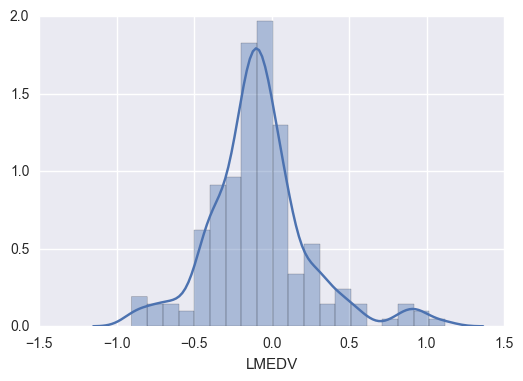

In [11]:
housResidual = testHous["LMEDV"] - testHousePred
sns.distplot(housResidual)

## Problem 2



### Problem 2A:

The Bayes decision boundary is given as below:

\begin{align}
\ln(p(\mathbf{x},C1)) &= \ln(p(\mathbf{x},C2))\\
\ln(p(\mathbf{x}~|~C1)) + \ln(P(C1)) &= \ln(p(\mathbf{x}~|~C2)) + \ln(P(C2)) \\
\ln(\frac{1}{(2\pi)^{k/2}|I|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_1)^T\Sigma_1^{-1}(\mathbf{x}-\mu_1) + \ln(\frac{2}{5}) &= \ln(\frac{1}{(2\pi)^{k/2}|2I|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_2)^T\Sigma_2^{-1}(\mathbf{x}-\mu_2) + \ln(\frac{3}{5}) \\
(\begin{bmatrix}x_1\\ x_2\end{bmatrix})^T{\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}}(\begin{bmatrix}x_1\\ x_2\end{bmatrix}) &= (\begin{bmatrix}x_1 - 1\\ x_2-3\end{bmatrix})^T{\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{2}\end{bmatrix}}(\begin{bmatrix}x_1 - 1\\ x_2-3\end{bmatrix}) -2 \ln(\frac{3}{2}) + 2\ln(2)\\
x_1^2 + x_2^2 &= \frac{1}{2}(x_1-1)^2 + \frac{1}{2}(x_2-3)^2 - 2 \ln(\frac{3}{4}) \\
\frac{1}{2}(x_1^2+2x_1-1) + \frac{1}{2}(x_2^2+6x_2-9) &= -2 \ln(\frac{3}{4}) \\
(x_1+1)^2 + (x_2+3)^2 &= 20 - 4 \ln(\frac{3}{4})
\end{align}

### Problem 2B:

First derive the generic optimal decision boundary for QDA. LDA will be a special case:

\begin{align*}
\ln(\frac{1}{|\Sigma_1|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_1)^T\Sigma_1^{-1}(\mathbf{x}-\mu_1) + \ln(p(C1)) &= \ln(\frac{1}{|\Sigma_2|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_2)^T\Sigma_2^{-1}(\mathbf{x}-\mu_2) + \ln(P(C2)) \\
(\begin{bmatrix}x_1 - \mu_{a} \\ x_2 - \mu_{b} \end{bmatrix})^T{\begin{bmatrix}\sigma_1 & \sigma_2 \\ \sigma_2 & \sigma_3 \end{bmatrix}}(\begin{bmatrix}x_1 - \mu_{a} \\ x_2 - \mu_{b} \end{bmatrix}) &= \begin{matrix} (\begin{bmatrix}x_1 - \mu_{c}\\ x_2-\mu_{d}\end{bmatrix})^T{\begin{bmatrix}\sigma_4 & \sigma_5 \\ \sigma_5 & \sigma_6 \end{bmatrix}}(\begin{bmatrix}x_1 - \mu_{c}\\ x_2-\mu_{d}\end{bmatrix}) -2 \ln(\frac{P(C2)|\Sigma_1|^{1/2}}{P(C1)|\Sigma_2|^{1/2}}) \end{matrix}\\
\sigma_1(x_1-\mu_a)^2 + 2 \sigma_2(x_1-\mu_a)(x_2-\mu_b) + \sigma_3(x_2 - \mu_b)^2 &= \begin{matrix} \sigma_4(x_1-\mu_c)^2 + 2 \sigma_5(x_1-\mu_c)(x_2-\mu_d) + \sigma_6(x_2 - \mu_d)^2- 2 \ln(\frac{P(C2)|\Sigma_1|^{1/2}}{P(C1)|\Sigma_2|^{1/2}}) \end{matrix} \\
x_2^2(\sigma_3-\sigma_6)+2x_2(\sigma_5\mu_c+\sigma_6\mu_d-\sigma_2\mu_a-\sigma_3\mu_b + x_1(\sigma_2 - \sigma_5)) &= \begin{matrix} x_1^2(\sigma_4-\sigma_1) + 2x_1(\sigma_1\mu_a+\sigma_2\mu_b - \sigma_4\mu_c - \sigma_5\mu_d) - \sigma_1\mu_a^2 +2(\sigma_5\mu_c\mu_d-\sigma_2\mu_a\mu_b) - \sigma_3\mu_b^2 +\sigma_4\mu_c^2+\sigma_6\mu_d^2 - 2\ln(\frac{P(C2)|\Sigma_1|^{1/2}}{P(C1)|\Sigma_2|^{1/2}})
\end{matrix}
\end{align*}

For LDA, $\Sigma_1 = \Sigma_2$, so the equation simplifies to the following:
\begin{align*}
x_2[\sigma_2(\mu_c - \mu_a) + \sigma_3(\mu_d-\mu_b)] &= \begin{matrix} x_1[\sigma_1(\mu_a - \mu_c) + \sigma_2(\mu_b - \mu_d)]  + \sigma_2(\mu_c\mu_d-\mu_a\mu_b) + \frac{1}{2}[\sigma_1(\mu_c^2-\mu_a^2) + \sigma_3(\mu_d^2 - \mu_b^2)]- \ln(\frac{P(C2)}{P(C1)}) \end{matrix} \\
\text{slope} &= \frac{\sigma_1(\mu_a - \mu_c) + \sigma_2(\mu_b - \mu_d)}{\sigma_2(\mu_c - \mu_a) + \sigma_3(\mu_d-\mu_b)} \\
\text{intercept} &= \frac{ \sigma_2(\mu_c\mu_d-\mu_a\mu_b) + \frac{1}{2}[\sigma_1(\mu_c^2-\mu_a^2) + \sigma_3(\mu_d^2 - \mu_b^2)] - \ln(\frac{P(C2)}{P(C1)})}{\sigma_2(\mu_c - \mu_a) + \sigma_3(\mu_d-\mu_b)}
\end{align*}

In [12]:
# Function to estimate the parameters for LDA
def estimate_lda(mv1, mv2):
    # calculate the priors
    pC1 = len(mv1)
    pC2 = len(mv2)
    # estimate the means
    mu1 = mv1.mean(axis=0)
    mu2 = mv2.mean(axis=0)
    # estimate the covariances
    sigma1 = np.cov(mv1.T)
    sigma2 = np.cov(mv2.T)
    sigma = 1.0/(len(mv1) + len(mv2))*(len(mv1)*sigma1 + len(mv2)*sigma2)
    return pC1, pC2, mu1, mu2, sigma

# function to predict the class using discriminant functions
def pred_lda(newdata, pC1, pC2, mu1, mu2, sigma):
    # calculate d_1(x)
    invSig = np.linalg.inv(sigma)
    delta1 = np.dot(newdata, np.dot(invSig, mu1))
    delta1 = delta1 - 0.5 * np.dot(mu1, np.dot(invSig, mu1))
    delta1 = delta1 + np.log(pC1)
    # calculate p(c2 | x)
    delta2 = np.dot(newdata, np.dot(invSig, mu2))
    delta2 = delta2 - 0.5 * np.dot(mu2, np.dot(invSig, mu2))
    delta2 = delta2 + np.log(pC2)
    return delta2 > delta1

# function to calculate the slope
def calc_line(pC1, pC2, mu1, mu2, sigma):
    invSigma = np.linalg.inv(sigma)
    sigma1 = sigma[0,0]
    sigma2 = sigma[0,1]
    sigma3 = sigma[1,1]
    num_slope = sigma1*(mu1[0] - mu2[0]) + sigma2*(mu1[1] - mu2[1])
    den = sigma2*(mu2[0] - mu1[0]) + sigma3*(mu2[1] - mu1[1])
    num_intercept = sigma2*(mu2[1]*mu2[0] - mu1[1]*mu1[0])
    num_intercept = num_intercept + 0.5 * (sigma1*(mu2[0]**2 - mu1[0]**2) + sigma3*(mu2[1]**2 - mu1[1]**2))
    num_intercept = num_intercept - np.log(pC2 / pC1)
    return num_slope/den, num_intercept / den


In [13]:
# Function to estimate the parameters for QDA
def estimate_qda(mv1, mv2):
    # calculate the priors
    pC1 = len(mv1)
    pC2 = len(mv2)
    # estimate the means
    mu1 = mv1.mean(axis=0)
    mu2 = mv2.mean(axis=0)
    # estimate the covariances
    sigma1 = np.cov(mv1.T)
    sigma2 = np.cov(mv2.T)
    return pC1, pC2, mu1, mu2, sigma1, sigma2

# function to predict the class using discriminant functions
def pred_qda(newdata, pC1, pC2, mu1, mu2, sigma1, sigma2):
    # calculate d_1(x)
    delta1 = -0.5 * np.log(np.linalg.det(sigma1))
    delta1 = delta1 - 0.5 * np.dot(np.dot(newdata - mu1, np.linalg.inv(sigma1)), (newdata - mu1).T)
    delta1 = delta1 + np.log(pC1)
    # calculate p(c2 | x)
    delta2 = -0.5 * np.log(np.linalg.det(sigma2))
    delta2 = delta2 - 0.5 * np.dot(np.dot(newdata - mu2, np.linalg.inv(sigma2)), (newdata - mu2).T)
    delta2 = delta2 + np.log(pC2)
    return delta2 > delta1

# function to calculate points along the boundary
def calc_qdaCirc(pC1, pC2, mu1, mu2, sigma1, sigma2):
    xPoint = np.linspace(-5, 5, num=5000)
    # set up the sigma1-sigma6 notations for the inverted vavlue
    invSigma1 = np.linalg.inv(sigma1)
    invSigma2 = np.linalg.inv(sigma2)
    s1 = invSigma1[0,0]
    s2 = invSigma1[0,1]
    s3 = invSigma1[1,1]
    s4 = invSigma2[0,0]
    s5 = invSigma2[0,1]
    s6 = invSigma2[1,1]
    # ax^2 + bx = constant
    constant = xPoint**2*(s4-s1)
    constant = constant + 2*xPoint*(s1*mu1[0]+s2*mu1[1]-s4*mu2[0]-s5*mu2[1])
    constant = constant - s1*mu1[0]**2 + 2*(s5*mu2[0]*mu2[1]-s2*mu1[0]*mu1[1])
    constant = constant - s3*mu1[1]**2 + s4*mu2[0]**2
    constant = constant + s6*mu2[1]**2 - 2*np.log((pC2*np.sqrt(np.linalg.det(sigma1))/(pC1*np.sqrt(np.linalg.det(sigma2)))))
    beta = 2*(s5*mu2[0] + s6*mu2[1] - s2*mu1[0] - s3*mu1[1] + xPoint*(s2 - s5))
    alpha = s3 - s6
    # calculate b^2+4ac (since the constant is on the right side)
    delta = (beta**2+4*alpha*constant)
    # remove the negative ones since we want to do the root
    nonNegDelta = delta >= 0
    xPoint = xPoint[nonNegDelta]
    delta = delta[nonNegDelta]
    beta = beta[nonNegDelta]
    constant = constant[nonNegDelta]
    # use quadratic root 
    # quadratic formula is [-b +/- sqrt(b^2-4ac)]/2a
    root1 = (-beta + np.sqrt(delta)) / (2*alpha)
    root2 = (-beta - np.sqrt(delta)) / (2*alpha)
    xPoint = np.append(xPoint, xPoint)
    yPoint = np.append(root1, root2)
    return xPoint, yPoint

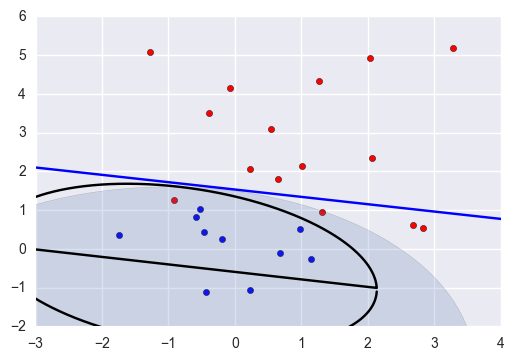

In [14]:
# generate points from the two different multivariate normals
np.random.seed(100)
mv1 = np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], 10)
mv2 = np.random.multivariate_normal([1, 3], [[2, 0], [0,2]], 15)

# plots the points
mpl.pyplot.scatter(mv1[:,0], mv1[:, 1], c='blue')
mpl.pyplot.scatter(mv2[:,0], mv2[:, 1], c='red')

ax = mpl.pyplot.gca()
# note that the optimal boundary is a circle
circ1 = mpl.pyplot.Circle((-1, -3), np.sqrt(20-4*np.log(3.0/4.0)), alpha=0.2, fc=None)
ax.add_artist(circ1)
# calculate lda
PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda = estimate_lda(mv1, mv2)
slope1, intercept1 = calc_line(PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)
# generate point -5 to 5
xLine = np.array([-5, 0, 5])
yLine = np.vectorize(lambda x: slope1*x + intercept1)(xLine)
ldaLine = mpl.pyplot.Line2D(xLine, yLine)
ax.add_artist(ldaLine)
#calculate qda
PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda = estimate_qda(mv1, mv2)
xQDA, yQDA = calc_qdaCirc(PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda)
qdaLine = mpl.pyplot.Line2D(xQDA, yQDA, c='black')
ax.add_artist(qdaLine)
ax.autoscale_view()
mpl.pyplot.show()


### Problem 2C:

Test using an adequate number of samples such as 100, and 150 that follows the known prior distribution

In [15]:
mv1test = np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], 1000)
mv2test = np.random.multivariate_normal([1, 3], [[2, 0], [0,2]], 1500)

hatLDAMv1 = pred_lda(mv1test, PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)
hatLDAMv2 = pred_lda(mv2test, PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)

yLDATrue = np.repeat([0, 1], [1000, 1500])
yLDAPred = np.append(hatLDAMv1, hatLDAMv2).astype(int)
print "Confusion Matrix:", metrics.confusion_matrix(yLDATrue, yLDAPred)

hatQDAMv1 = np.apply_along_axis(lambda x: pred_qda(x, PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda), 1, mv1test)
hatQDAMv2 = np.apply_along_axis(lambda x: pred_qda(x, PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda), 1, mv2test)

yQDATrue = np.repeat([0, 1], [1000, 1500])
yQDAPred = np.append(hatQDAMv1, hatQDAMv2).astype(int)
print "Confusion Matrix:", metrics.confusion_matrix(yQDATrue, yQDAPred)

pd.DataFrame([["LDA", 1 - metrics.accuracy_score(yLDATrue, yLDAPred)],
              ["QDA", 1 - metrics.accuracy_score(yQDATrue, yQDAPred)]], columns=["Type", "Err Rate"])

Confusion Matrix: [[ 884  116]
 [ 152 1348]]
Confusion Matrix: [[ 842  158]
 [ 101 1399]]


,Type,Err Rate
0,LDA,0.1072
1,QDA,0.1036


### Problem 2D & 2E:

Repeating parts C & D with more samples

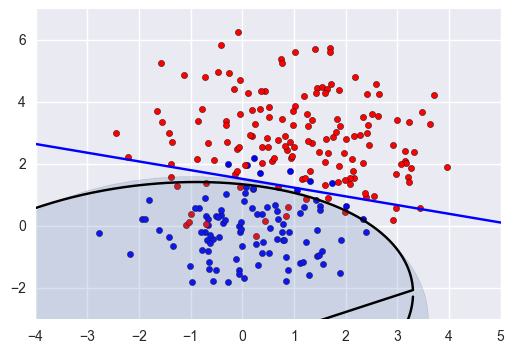

In [16]:
mv1 = np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], 100)
mv2 = np.random.multivariate_normal([1, 3], [[2, 0], [0,2]], 150)

# plots the points
mpl.pyplot.scatter(mv1[:,0], mv1[:, 1], c='blue')
mpl.pyplot.scatter(mv2[:,0], mv2[:, 1], c='red')

ax = mpl.pyplot.gca()
# note that the optimal boundary is a circle
circ1 = mpl.pyplot.Circle((-1, -3), np.sqrt(20-4*np.log(3.0/4.0)), alpha=0.2, fc=None)
ax.add_artist(circ1)
# calculate lda
PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda = estimate_lda(mv1, mv2)
slope1, intercept1 = calc_line(PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)
# generate point -5 to 5
xLine = np.array([-5, 0, 5])
yLine = np.vectorize(lambda x: slope1*x + intercept1)(xLine)
ldaLine = mpl.pyplot.Line2D(xLine, yLine)
ax.add_artist(ldaLine)
#calculate qda
PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda = estimate_qda(mv1, mv2)
xQDA, yQDA = calc_qdaCirc(PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda)
qdaLine = mpl.pyplot.Line2D(xQDA, yQDA, c='black')
ax.add_artist(qdaLine)
ax.autoscale_view()
mpl.pyplot.show()

In [17]:
mv1test = np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], 1000)
mv2test = np.random.multivariate_normal([1, 3], [[2, 0], [0,2]], 1500)

hatLDAMv1 = pred_lda(mv1test, PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)
hatLDAMv2 = pred_lda(mv2test, PC1_lda, PC2_lda, mu1_lda, mu2_lda, sigma_lda)

yLDATrue = np.repeat([0, 1], [1000, 1500])
yLDAPred = np.append(hatLDAMv1, hatLDAMv2).astype(int)
print "Confusion Matrix:", metrics.confusion_matrix(yLDATrue, yLDAPred)

hatQDAMv1 = np.apply_along_axis(lambda x: pred_qda(x, PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda), 1, mv1test)
hatQDAMv2 = np.apply_along_axis(lambda x: pred_qda(x, PC1_qda, PC2_qda, mu1_qda, mu2_qda, sigma1_qda, sigma2_qda), 1, mv2test)

yQDATrue = np.repeat([0, 1], [1000, 1500])
yQDAPred = np.append(hatQDAMv1, hatQDAMv2).astype(int)
print "Confusion Matrix:", metrics.confusion_matrix(yQDATrue, yQDAPred)

pd.DataFrame([["LDA", 1 - metrics.accuracy_score(yLDATrue, yLDAPred)],
              ["QDA", 1 - metrics.accuracy_score(yQDATrue, yQDAPred)]], columns=["Type", "Err Rate"])

Confusion Matrix: [[ 914   86]
 [ 130 1370]]
Confusion Matrix: [[ 905   95]
 [ 110 1390]]


,Type,Err Rate
0,LDA,0.0864
1,QDA,0.0820


You can see that havivng more samples to estimate the mean and covariance yields lower error rates and a more accurate classifier for both LDA and QDA

### Problem 2F:

The new objective for the decision boundary where the cost of misclassifying an input belonging to C1 is twice as expensive compared to an input belonging to C2 is:
\begin{align*}
\ln(2p(\mathbf{x},C1)) &= \ln(p(\mathbf{x},C2))\\
\ln(p(\mathbf{x}~|~C1)) + \ln(2P(C1)) &= \ln(p(\mathbf{x}~|~C2)) + \ln(P(C2)) \\
\ln(\frac{1}{(2\pi)^{k/2}|I|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_1)^T\Sigma_1^{-1}(\mathbf{x}-\mu_1) + \ln(\frac{4}{5}) &= \ln(\frac{1}{(2\pi)^{k/2}|2I|^{1/2}})-\frac{1}{2}(\mathbf{x}-\mu_2)^T\Sigma_2^{-1}(\mathbf{x}-\mu_2) + \ln(\frac{3}{5}) \\
(\begin{bmatrix}x_1\\ x_2\end{bmatrix})^T{\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}}(\begin{bmatrix}x_1\\ x_2\end{bmatrix}) &= (\begin{bmatrix}x_1 - 1\\ x_2-3\end{bmatrix})^T{\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{2}\end{bmatrix}}(\begin{bmatrix}x_1 - 1\\ x_2-3\end{bmatrix}) -2 \ln(\frac{3}{4}) + 2\ln(2)\\
x_1^2 + x_2^2 &= \frac{1}{2}(x_1-1)^2 + \frac{1}{2}(x_2-3)^2 - 2 \ln(\frac{3}{8}) \\
\frac{1}{2}(x_1^2+2x_1-1) + \frac{1}{2}(x_2^2+6x_2-9) &= -2 \ln(\frac{3}{8}) \\
(x_1+1)^2 + (x_2+3)^2 &= 20 - 4 \ln(\frac{3}{8})
\end{align*}

## Problem 3

First we start with the probability that a point belongs to a class and break it down using Bayes theorem:
\begin{align*}
P(C_1 | x) &= \frac{P(x | C_1)P(C_1)}{P(x)} \\
&= \frac{P(x | C_1)P(C_1)}{P(x | C_1)P(C_1) + P(x | C_2)P(C_2)} \\
&=\frac{P(x | C_1)P(C_1)}{1 + \frac{P(x | C_2)}{P(x | C_1)}\frac{P(C_2)}{P(C_1)}}  \\
&= \frac{1}{1 + \exp{\{ -\log \frac{P(x | C_1)}{P(x | C_2)}-\log\frac{P(C_1)}{P(C_2)}\}}} \\
\end{align*}
Looking at the $\log \frac{P(x | C_1)}{P(x | C_2)}$ term, since $\log\frac{P(C_1)}{P(C_2)}$ is a constant:
\begin{align*}
\log \frac{P(x | C_1)}{P(x | C_2)} &= \log \frac{\frac{1}{(2\pi)^{k/2}|\Sigma_1|^{1/2}}\exp{\{-\frac{1}{2}(x-\mu_1)^\mathsf{T}\Sigma_1^{-1}(x-\mu_1)\}}}{\frac{1}{(2\pi)^{k/2}|\Sigma_2|^{1/2}}\exp{\{-\frac{1}{2}(x-\mu_2)^\mathsf{T}\Sigma_2^{-1}(x-\mu_2)\}}} \\
&= \frac{1}{2}\log{\frac{|\Sigma_2|}{|\Sigma_1|}} + \frac{1}{2}\{(x-\mu_2)^\mathsf{T}\Sigma_2^{-1}(x-\mu_2) - (x-\mu_1)^\mathsf{T}\Sigma_1^{-1}(x-\mu_1)\}\\
\end{align*}
Group all the constants together into $K$:
\begin{align*}
P(C_1 | z) &=\frac{1}{1 + \exp{\{-((x-\mu_2)^\mathsf{T}\Sigma_2^{-1}(x-\mu_2) - (x-\mu_1)^\mathsf{T}\Sigma_1^{-1}(x-\mu_1)) - K\}}} \\
&= \frac{1}{1 + \exp{-\{\beta^\mathsf{T} z + K \}}}
\end{align*}

## Problem 4


In [18]:
# load the data
spamTrain = pd.read_csv("spam.train.dat", sep=' ', header = None)
spamTest = pd.read_csv("spam.test.dat", sep=" ", header=None)

# split into train features and labels
trainX = spamTrain.ix[:, spamTrain.columns != 57]
trainY = spamTrain.ix[:, 57]

testX = spamTest.ix[:, spamTest.columns != 57]
testY = spamTest.ix[:, 57]

# load preprocessing library
from sklearn import preprocessing

### Standardizing the features

In [19]:
# standardize the features
scaler = preprocessing.StandardScaler().fit(trainX)
stdTrainX = scaler.transform(trainX)
stdTestX = scaler.transform(testX)

stdLogR = linear_model.LogisticRegression()
stdLogR.fit(stdTrainX, trainY)
# get the accuracy
stdPredTrainY = stdLogR.predict(stdTrainX)
stdPredTestY = stdLogR.predict(stdTestX)

print "Training accuracy:", metrics.accuracy_score(trainY, stdPredTrainY)
print "Test accuracy:", metrics.accuracy_score(testY, stdPredTestY)

Training accuracy: 0.931666666667
Test accuracy: 0.92004996877


### Log transforming all the features

In [20]:
# define a log transformer
def logTrans(x):
    return np.log(x + 0.1)

logTransformer = preprocessing.FunctionTransformer(logTrans)
logTrainX = logTransformer.transform(trainX)
logTestX = logTransformer.transform(testX)

logLogR = linear_model.LogisticRegression()
logLogR.fit(logTrainX, trainY)
# get the accuracy
logPredTrainY = logLogR.predict(logTrainX)
logPredTestY = logLogR.predict(logTestX)

print "Training accuracy:", metrics.accuracy_score(trainY, logPredTrainY)
print "Test accuracy:", metrics.accuracy_score(testY, logPredTestY)

Training accuracy: 0.949
Test accuracy: 0.936914428482


### Binarizing the features

In [21]:
binarizer = preprocessing.Binarizer()
binTrainX = binarizer.transform(trainX)
binTestX = binarizer.transform(testX)

binLogR = linear_model.LogisticRegression()
binLogR.fit(binTrainX, trainY)
# get the accuracy
binPredTrainY = binLogR.predict(binTrainX)
binPredTestY = binLogR.predict(binTestX)

print "Training accuracy:", metrics.accuracy_score(trainY, binPredTrainY)
print "Test accuracy:", metrics.accuracy_score(testY, binPredTestY)

Training accuracy: 0.937333333333
Test accuracy: 0.922548407245


## ROC and AUC on the three data

In [22]:
# AUC and ROC curve for standardization
stdTestProb = stdLogR.predict_proba(stdTestX)
stdfpr, stdtpr, stdthresholds = metrics.roc_curve(testY, stdTestProb[:, 1])
stdAUC = metrics.auc(stdfpr, stdtpr)

# AUC and ROC curve for log
logTestProb = logLogR.predict_proba(stdTestX)
logfpr, logtpr, logthresholds = metrics.roc_curve(testY, logTestProb[:, 1])
logAUC = metrics.auc(logfpr, logtpr)

# AUC and ROC curve for bin
binTestProb = binLogR.predict_proba(stdTestX)
binfpr, bintpr, binthresholds = metrics.roc_curve(testY, binTestProb[:, 1])
binAUC = metrics.auc(binfpr, bintpr)

In [23]:
## create a table that reflects the data
pd.DataFrame([["Standardize", metrics.accuracy_score(trainY, stdPredTrainY), metrics.accuracy_score(testY, stdPredTestY), stdAUC],
             ["Log", metrics.accuracy_score(trainY, logPredTrainY), metrics.accuracy_score(testY, logPredTestY), logAUC],
             ["Binarize",  metrics.accuracy_score(trainY, binPredTrainY), metrics.accuracy_score(testY, binPredTestY), binAUC]],
             columns = ["Type", "ACC (Train)", "ACC (Test)", "AUC"])

,Type,ACC (Train),ACC (Test),AUC
0,Standardize,0.931667,0.920050,0.969405
1,Log,0.949000,0.936914,0.957226
2,Binarize,0.937333,0.922548,0.944879


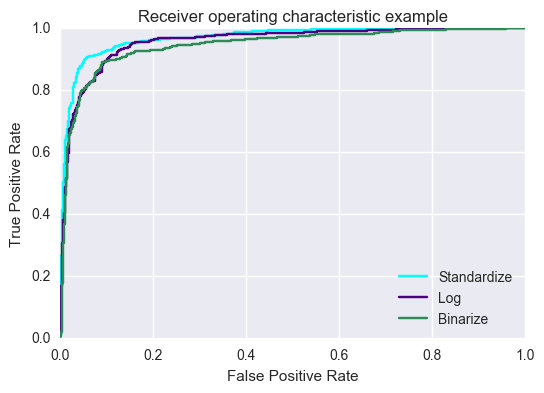

In [24]:
mpl.pyplot.plot(stdfpr, stdtpr, color='cyan', label='Standardize')
mpl.pyplot.plot(logfpr, logtpr, color='indigo', label='Log')
mpl.pyplot.plot(binfpr, bintpr, color='seagreen', label='Binarize')
mpl.pyplot.xlabel('False Positive Rate')
mpl.pyplot.ylabel('True Positive Rate')
mpl.pyplot.title('Receiver operating characteristic example')
mpl.pyplot.legend(loc="lower right")
mpl.pyplot.show()

We can see from the ROC perspective, standardization does better at the low false positive rates compared to the other two preprocessing techniques. Hence, the AUC for standardization is higher. It is more interesting that overall the accuracy is better for the data that has been logged transform.